In [1]:
# the simple SIR model to incorporate a treatment intervention and study its effect on the epidemiology of an immunising infection

# To model a viral epidemic in a town of 300,000 people, which starts with the introduction of a single infected case in a fully susceptible population
# From other, similar outbreaks elsewhere, public health authorities believe the infection rate is 0.6 days −1  and that people stay infected for 5 days on average before recovering
# Once recovered, people are immune to reinfection

# Luckily, a treatment against the virus is available. Although it does not cure people immediately, it helps them to recover more quickly: on average, people recover after 1.25 days of treatment
# Treatment has no effect on transmission of the virus, so treated people are just as infectious as untreated infected people
# Imagine that people start taking the treatment on average 4 days after becoming infected

# here we have a new situation where infectious people are now separated into 2 different compartments: treated ( 𝑇 ) and untreated ( 𝐼 ) infected people can transmit the virus

# Specifying the force of infection in the treatment model:
# Remember, the force of infection  𝜆  acts on susceptibles. It removes people from the  𝑆  compartment and adds them into the  𝐼  compartment - this remains the same in our treatment model.

# The only difference is that people in both the  𝐼  and  𝑇  compartments are a source of infection now 
# Here, we assume they are equally good at passing on the infection, which means they both transmit the virus to susceptibles at a rate  𝛽 . 
# Remember,  𝛽  is simply the average number of secondary infections caused by an infectious person per unit time - here we are assuming that untreated and treated people cause the same average number of secondary infections per unit time.

# In the basic SIR model, the equation for the force of infection was:
# 𝜆=𝛽𝐼/𝑁

# All we have to do now is add those additional infectious people in the  𝑇  compartment:
# 𝜆=𝛽(𝐼+𝑇)/𝑁

# Or another way of expressing this:
# 𝜆=𝛽𝐼/𝑁+𝛽𝑇/𝑁

# Extending the SIR model to model a treatment which speeds up recovery:

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Warning message:
"package 'deSolve' was built under R version 3.6.3"Warning message:
"package 'reshape2' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


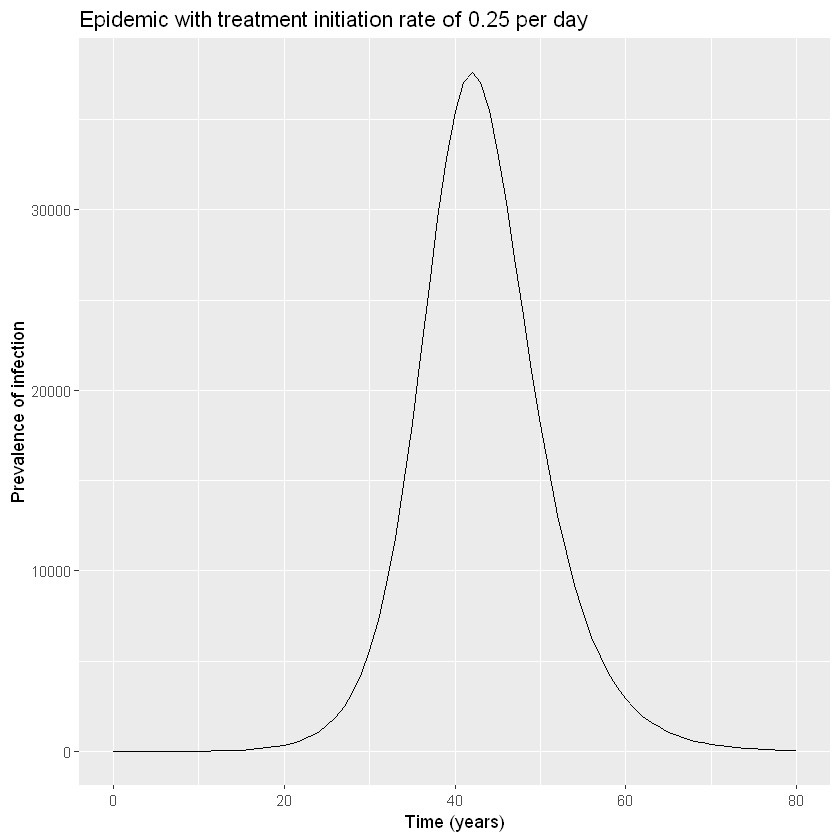

In [2]:
# LOAD THE PACKAGES:
library(deSolve)
library(reshape2)
library(ggplot2)

# MODEL INPUTS:

# Initial number of people in each compartment
initial_state_values <- c(S = 300000,         
                          I = 1,           
                          R = 0,          
                          T = 0)   # treatment compartment: no one is on 
                                   # treatment at the beginning of the simulation


# Parameters describing the transition rates in units of days^-1
parameters <- c(beta = 0.6,       # the infection rate
                gamma = 0.2,      # the natural (untreated) rate of recovery
                h = 0.25,         # the rate of treatment initiation
                gamma_t = 0.8)    # the rate of recovery after treatment

# TIMESTEPS:

# Sequence of timesteps to solve the model at
times <- seq(from = 0, to = 80, by = 1) # from 0 to 80 days in daily intervals

# MODEL FUNCTION: 

treatment_model <- function(time, state, parameters) {  

    with(as.list(c(state, parameters)), {    
        
    # Calculating the total population size N 
      N <- S+I+R+T                # need to add the treated compartment here
      
    # Defining lambda
      lambda <- beta * (I+T)/N    # force of infection depends on the proportion 
                                  # in the I and T compartment  
        
    # The differential equations
      dS <- -lambda * S            
      dI <- lambda * S - gamma * I - h * I  # infected people initiate 
                                            # treatment at a rate h  
      dT <- h * I - gamma_t * T             # people enter the treated 
                                            # compartment at rate h and 
                                            # recover at rate gamma_t
      dR <- gamma * I + gamma_t * T         # movement into the recovered compartment 
                                            # is from infected and treated compartment
      
    # Return the number of people in each compartment at each timestep 
    # (in the same order as the input state variables)
    return(list(c(dS, dI, dR, dT)))         # need to add the rate of change in 
                                            # the treated compartment T here
    })
  
}

# MODEL OUTPUT:

# Solving the differential equations using the ode integration algorithm
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = treatment_model,
                            parms = parameters))

# Plot the number infected
ggplot(data = output,                                               
       aes(x = time, y = I+T)) +     # infected people include those 
                                     # untreated (I) and treated (T)
  geom_line() +                                                          
  xlab("Time (years)")+                                                   
  ylab("Prevalence of infection") +                                      
  labs(title = paste("Epidemic with treatment initiation rate of", 
                     parameters["h"], "per day"))

In [3]:
# How many people are infected at the peak of the epidemic?
# At the peak of the epidemic around 37600 are infected - this includes the  𝐼  as well as the  𝑇  (treated) compartment.

# Increasing the treatment initiation rate to interrupt transmission (reduce R0 below 1):

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

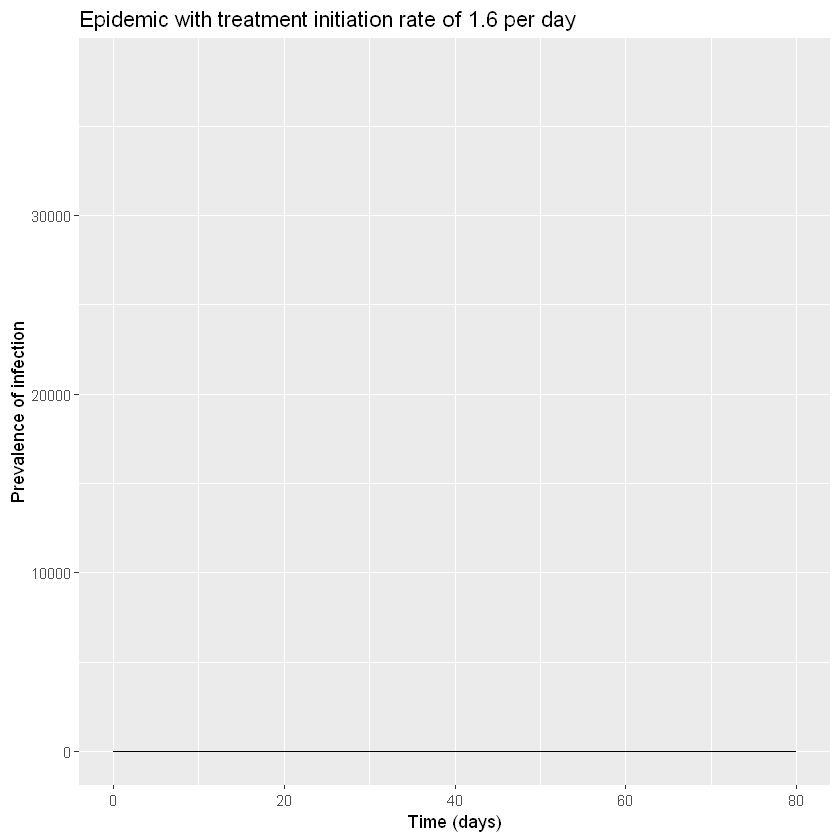

In [4]:
# Increase the treatment initiation rate
parameters["h"] <- 1.6

# Simulate the model
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = treatment_model,
                            parms = parameters))

# Plot the number infected (I+T compartments)
ggplot(data = output,                                               
       aes(x = time, y = I+T)) +                
  geom_line() +                                                          
  xlab("Time (days)")+                                                   
  ylab("Prevalence of infection") +                                      
  labs(title = paste("Epidemic with treatment initiation rate of", 
                     parameters["h"], "per day")) +
  ylim(c(0,38000))          # for visual purposes add the same limit on the
                            # y axis as on previous plot

# If you look at the numbers infected or remove the limit on the y axis, 
# you will see that with h = 1.6, the number of infected people never 
# rises up to 2, in comparison to h = 1.5 for example. 

In [5]:
# How rapidly does treatment need to be initiated in order to interrupt transmission, i.e. to bring R0 below 1? 
# Based on this, do you think it is feasible to interrupt transmission through treatment alone?

# To interrupt transmission by bringing R0 below 1, the treatment initiation rate needs to be at least 1.6 per day, which means people need to start treatment less than a day after becoming infected on average.

# To achieve a reduction in the treatment initiation rate, think about what it depends on: the time it takes people to go to a doctor, the time it takes to get a diagnosis, and the time from diagnosis to starting treatment for example. 
# These in turn depend on many situational aspects such as whether the disease is symptomatic, the healthcare system, which test is required for a diagnosis etc.
# One way of increasing the rate of treatment initiation would be through active case-finding for example, rather than waiting for people to seek medical attention themselves.

# However, given all these factors, achieving a treatment initiation rate as high as required in this example does not seem feasible.

# Using only reasoning based on R0 (i.e. without computer simulation), what is the minimum value of h needed to interrupt transmission? 
# Is this consistent with what you found using the model in the previous question?

# Remember that R0 is defined as the average number of secondary infections caused by a single infectious case (in a totally susceptible population). 
# We can derive the following equation:
# 𝑅0 = 𝛽/(𝛾+ℎ) + ℎ/(𝛾+ℎ) ×(𝛽/𝛾𝑇)

# Here, we are taking the average of secondary infections caused by index cases in the I and the T compartment, keeping in mind that only a proportion
# ℎ/(𝛾+ℎ)
# move into the treatment compartment before recovering

# Solving this equation with our parameter values to obtain R0 < 1:
# 1 > 0.6/(0.2+ℎ) + ℎ/(0.2+ℎ) × 0.6/0.8
# 0.2 + ℎ > 0.6 + 0 .75h
# ℎ > 1.6

# This is consistent with the value we found with the model in the previous question!


# What other (theoretical) changes could you make to this treatment to improve its impact on the epidemic?
# In reality, the delay between people becoming infected and people starting on treatment is often the only thing that can be changed to some degree during an outbreak. 
# However, given more time, improving the efficacy and biological action of the treatment itself is likely to improve its impact on reducing the prevalence, for example by: 

# increasing the recovery rate of those on treatment
# developing a treatment that additionally reduces the infectiousness of those who take it

# Keep in mind though that how the efficacy of a treatment translates into its population-level impact is not always obvious, and depends again on many other factors.

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows